# Iteration4 BDAS

In [1]:
#Libiaries

#pyspark
from pyspark.sql.functions import when, col, trim, lower, split, count, avg, format_number
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType,FloatType,DoubleType)
from pyspark.ml.feature import StringIndexer, OneHotEncoder, PCA
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession



#visualisation library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



## 1.0 BU
Refer to Report
## 2.0 DU
### 2.1 Collect initial data

In [2]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration4').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/09 13:45:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# Importing data which has a header. Schema is automatically configured.
df = spark.read.csv('Datasets/Sleep_health_and_lifestyle_dataset(with_dirt).csv', inferSchema=True, header=True)

### 2.2 Describe the data

In [4]:
# Display up to 5 rows at once
df.show(n=5)

+---------+------+---+--------------------+--------------+----------------+-----------------------+------------+------------+--------------+----------+-----------+--------------+
|Person ID|Gender|Age|          Occupation|Sleep Duration|Quality of Sleep|Physical Activity Level|Stress Level|BMI Category|Blood Pressure|Heart Rate|Daily Steps|Sleep Disorder|
+---------+------+---+--------------------+--------------+----------------+-----------------------+------------+------------+--------------+----------+-----------+--------------+
|        1|  Male| 27|   Software Engineer|           6.1|               6|                     42|           6|  Overweight|        126/83|        77|       4200|          None|
|        2|  Male| 28|              Doctor|           6.2|               6|                     60|           8|      Normal|        125/80|        75|      10000|          None|
|        3|  Male| 28|              Doctor|           6.2|               6|                     60|      

In [5]:
#first row
df.head(1)

[Row(Person ID=1, Gender='Male', Age=27, Occupation='Software Engineer', Sleep Duration=6.1, Quality of Sleep=6, Physical Activity Level=42, Stress Level=6, BMI Category='Overweight', Blood Pressure='126/83', Heart Rate=77, Daily Steps=4200, Sleep Disorder='None')]

In [6]:
#columns details
df.columns

['Person ID',
 'Gender',
 'Age',
 'Occupation',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'BMI Category',
 'Blood Pressure',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder']

In [7]:
#coutn columns
column_count = len(df.columns)
"Number of columns:", column_count

('Number of columns:', 13)

In [8]:
#count rows
row_count = df.count()
"Number of rows:", row_count

('Number of rows:', 375)

In [9]:
#general statistics
df.describe().show()

+-------+------------------+------+-----------------+----------+------------------+------------------+-----------------------+------------------+------------+--------------+-----------------+------------------+--------------+
|summary|         Person ID|Gender|              Age|Occupation|    Sleep Duration|  Quality of Sleep|Physical Activity Level|      Stress Level|BMI Category|Blood Pressure|       Heart Rate|       Daily Steps|Sleep Disorder|
+-------+------------------+------+-----------------+----------+------------------+------------------+-----------------------+------------------+------------+--------------+-----------------+------------------+--------------+
|  count|               375|   375|              375|       375|               375|               375|                    375|               375|         375|           375|              374|               374|           375|
|   mean|             188.0|  null|           42.136|      null| 7.134933333333324| 7.3146666666

In [10]:
# Select the first 6 columns by index
selected_columns = df.columns[:6]  

# Create a new DataFrame with the selected columns
selected_df = df.select(selected_columns)

# Calculate and display summary statistics for the selected columns
selected_describe = selected_df.describe()
selected_describe.show()

# Select and create 6-10 columns by index
selected_columns2 = df.columns[6:10]  
selected_df2 = df.select(selected_columns2)

# display
selected_df2.describe().show()

# Select and create remainingn columns
selected_columns3 = df.columns[10:]  
selected_df3 = df.select(selected_columns3)

# display
selected_df3.describe().show()

+-------+------------------+------+-----------------+----------+------------------+------------------+
|summary|         Person ID|Gender|              Age|Occupation|    Sleep Duration|  Quality of Sleep|
+-------+------------------+------+-----------------+----------+------------------+------------------+
|  count|               375|   375|              375|       375|               375|               375|
|   mean|             188.0|  null|           42.136|      null| 7.134933333333324| 7.314666666666667|
| stddev|108.39741694339399|  null|8.712285259247578|      null|0.7965036789098551|1.1958812262546714|
|    min|                 1|Female|               24|Accountant|               5.8|                 4|
|    max|               375|  Male|               59|   Teacher|               8.5|                 9|
+-------+------------------+------+-----------------+----------+------------------+------------------+

+-------+-----------------------+------------------+------------+-------

In [11]:
df.printSchema()

root
 |-- Person ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Sleep Duration: double (nullable = true)
 |-- Quality of Sleep: integer (nullable = true)
 |-- Physical Activity Level: integer (nullable = true)
 |-- Stress Level: integer (nullable = true)
 |-- BMI Category: string (nullable = true)
 |-- Blood Pressure: string (nullable = true)
 |-- Heart Rate: integer (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Disorder: string (nullable = true)



In [12]:
# Select the first 6 columns by index
selected_columns = df.columns[:6]  

# Create a new DataFrame with the selected columns
selected_df = df.select(selected_columns)

# Calculate and display summary statistics for the selected columns
selected_describe = selected_df.describe()
selected_describe.show()

# Select and create 6-10 columns by index
selected_columns2 = df.columns[6:10]  
selected_df2 = df.select(selected_columns2)

# display
selected_df2.describe().show()

# Select and create remainingn columns
selected_columns3 = df.columns[10:]  
selected_df3 = df.select(selected_columns3)

# display
selected_df3.describe().show()

+-------+------------------+------+-----------------+----------+------------------+------------------+
|summary|         Person ID|Gender|              Age|Occupation|    Sleep Duration|  Quality of Sleep|
+-------+------------------+------+-----------------+----------+------------------+------------------+
|  count|               375|   375|              375|       375|               375|               375|
|   mean|             188.0|  null|           42.136|      null| 7.134933333333324| 7.314666666666667|
| stddev|108.39741694339399|  null|8.712285259247578|      null|0.7965036789098551|1.1958812262546714|
|    min|                 1|Female|               24|Accountant|               5.8|                 4|
|    max|               375|  Male|               59|   Teacher|               8.5|                 9|
+-------+------------------+------+-----------------+----------+------------------+------------------+

+-------+-----------------------+------------------+------------+-------

### 2.3 Explore the data

In [13]:
#visualisation library
import matplotlib.pyplot as plt

In [14]:
#import in the relevant types.
from pyspark.sql.functions import col
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType,FloatType)

# Define the new data types
new_data_types = [
    StructField('Person ID', IntegerType(), True),
    StructField('Gender', StringType(), True),
    StructField('Age', IntegerType(), True),
    StructField('Occupation', StringType(), True),
    StructField('Sleep Duration', FloatType(), True),
    StructField('Quality of Sleep', IntegerType(), True),
    StructField('Physical Activity Level', IntegerType(), True),
    StructField('Stress Level', IntegerType(), True),
    StructField('BMI Category', StringType(), True),
    StructField('Blood Pressure', StringType(), True),
    StructField('Heart Rate', IntegerType(), True),
    StructField('Daily Steps', IntegerType(), True),
    StructField('Sleep Disorder', StringType(), True)
]

# Apply the new data types to the DataFrame
for field in new_data_types:
    df = df.withColumn(field.name, col(field.name).cast(field.dataType))

df.printSchema()

root
 |-- Person ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Quality of Sleep: integer (nullable = true)
 |-- Physical Activity Level: integer (nullable = true)
 |-- Stress Level: integer (nullable = true)
 |-- BMI Category: string (nullable = true)
 |-- Blood Pressure: string (nullable = true)
 |-- Heart Rate: integer (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Disorder: string (nullable = true)



In [15]:
#1. Correlation between the variables
numeric_columns = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]

#calculate correlations between numeric columns
correlations = {}
for col1 in numeric_columns:
    for col2 in numeric_columns:
        if col1 != col2:
            correlation = df.corr(col1, col2)
            correlations[f"{col1} vs {col2}"] = correlation

#rank correlations from high to low
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

#print or use the sorted correlation values
for key, value in sorted_correlations:
    print(f"Correlation between {key}: {value}")

Correlation between Stress Level vs Quality of Sleep: -0.8988221179010679
Correlation between Quality of Sleep vs Stress Level: -0.8988221179010678
Correlation between Sleep Duration vs Quality of Sleep: 0.8827599898099926
Correlation between Quality of Sleep vs Sleep Duration: 0.8827599898099926
Correlation between Stress Level vs Sleep Duration: -0.8112107037194135
Correlation between Sleep Duration vs Stress Level: -0.8112107037194134
Correlation between Physical Activity Level vs Daily Steps: 0.7430129424357466
Correlation between Daily Steps vs Physical Activity Level: 0.7430129424357462
Correlation between Stress Level vs Heart Rate: 0.5298582185138335
Correlation between Heart Rate vs Stress Level: 0.5298582185138334
Correlation between Quality of Sleep vs Heart Rate: -0.5153849267003257
Correlation between Heart Rate vs Quality of Sleep: -0.5153849267003254
Correlation between Age vs Quality of Sleep: 0.4675684450648573
Correlation between Quality of Sleep vs Age: 0.46756844506

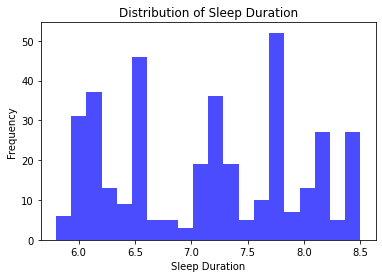

In [16]:
#2. Distribution of Sleep Duration
sleep_duration_distribution = df.select("Sleep Duration").toPandas()
plt.hist(sleep_duration_distribution, bins=20, color='blue', alpha=0.7)
plt.xlabel("Sleep Duration")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep Duration")
plt.show()

In [17]:
#register your DataFrame as a temporary SQL table
df.createOrReplaceTempView("sleep_table")

#SQL query to get counts for Sleep Duration < 7 and >= 7
sleep_duration_distribution = spark.sql("""
    SELECT
        CASE WHEN CAST(`Sleep Duration` AS FLOAT) < 7 THEN '< 7 hours'
             WHEN CAST(`Sleep Duration` AS FLOAT) >= 7 THEN '>= 7 hours'
             ELSE 'Unknown'
        END AS SleepDurationCategory,
        COUNT(*) AS Count
    FROM sleep_table
    WHERE `Sleep Duration` IS NOT NULL
    GROUP BY SleepDurationCategory
""")
#show the Sleep Duration distribution
sleep_duration_distribution.show()

+---------------------+-----+
|SleepDurationCategory|Count|
+---------------------+-----+
|            < 7 hours|  155|
|           >= 7 hours|  220|
+---------------------+-----+



In [18]:
#3. Values in Gender (use SQL)
#register your DataFrame as a temporary SQL table
df.createOrReplaceTempView("sleep_table")

#use SQL queries to get gender counts
gender_distribution = spark.sql("SELECT Gender, COUNT(*) AS Count FROM sleep_table WHERE Gender != 'Gender' GROUP BY Gender")
gender_distribution.show()

+------+-----+
|Gender|Count|
+------+-----+
|Female|  186|
|  Male|  189|
+------+-----+



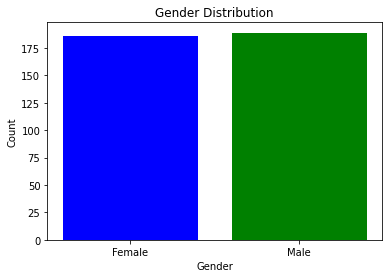

In [19]:
#plot the gender distribution
gender_counts = gender_distribution.toPandas()

plt.figure(figsize=(6, 4))
plt.bar(gender_counts['Gender'], gender_counts['Count'], color=['blue', 'green'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

In [20]:
#4. Distribution of Quality of Sleep
df.groupBy('Quality of Sleep').count().orderBy(col('Quality of Sleep')).show()

+----------------+-----+
|Quality of Sleep|count|
+----------------+-----+
|               4|    5|
|               5|    7|
|               6|  105|
|               7|   77|
|               8|  110|
|               9|   71|
+----------------+-----+



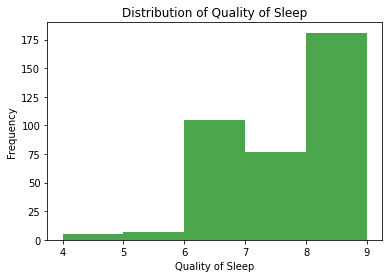

In [21]:
quality_of_sleep_distribution = df.select("Quality of Sleep").toPandas()
plt.hist(quality_of_sleep_distribution, bins=5, color='green', alpha=0.7)
plt.xlabel("Quality of Sleep")
plt.ylabel("Frequency")
plt.title("Distribution of Quality of Sleep")
plt.show()

In [22]:
df.groupBy('Sleep Disorder').count().show()

+--------------+-----+
|Sleep Disorder|count|
+--------------+-----+
|          None|  220|
|   Sleep Apnea|   78|
|      Insomnia|   77|
+--------------+-----+



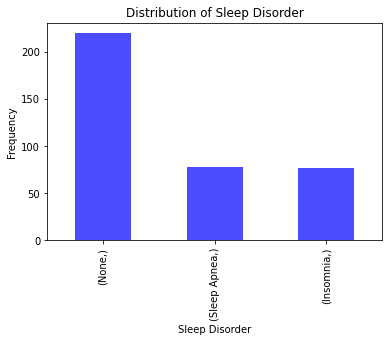

In [23]:
#5. Distribution in 'Sleep Disorder'
sleep_disorder_distribution = df.select("Sleep Disorder").toPandas()
sleep_disorder_distribution.value_counts().plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel("Sleep Disorder")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep Disorder")
plt.show()

In [24]:
#6. Correlation between Sleep Duration and Quality of Sleep
correlation_sleep_duration_quality = df.corr("Sleep Duration", "Quality of Sleep")
print("Correlation between Sleep Duration and Quality of Sleep:", correlation_sleep_duration_quality)

Correlation between Sleep Duration and Quality of Sleep: 0.8827599898099926


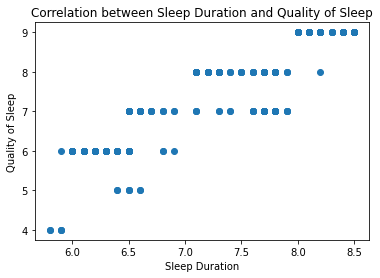

In [25]:
#plot the correlation
plt.scatter(df.select('Sleep Duration').toPandas(), df.select('Quality of Sleep').toPandas())
plt.title('Correlation between Sleep Duration and Quality of Sleep')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()

In [26]:
#7. Correlation between Age and Quality of Sleep
correlation_age_quality = df.corr("Age", "Quality of Sleep")
print("Correlation between Age and Quality of Sleep:", correlation_age_quality)

Correlation between Age and Quality of Sleep: 0.4675684450648573


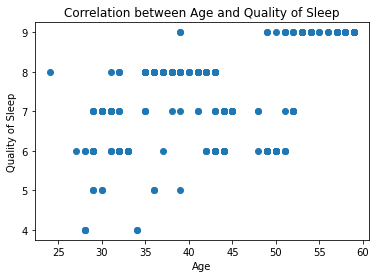

In [27]:
#plot the correlation
plt.scatter(df.select('Age').toPandas(), df.select('Quality of Sleep').toPandas())
plt.title('Correlation between Age and Quality of Sleep')
plt.xlabel('Age')
plt.ylabel('Quality of Sleep')
plt.show()

In [28]:
#register the DataFrame as a temporary table
df.createOrReplaceTempView("sleep_data")

from pyspark.sql.functions import avg, round

#calculate the average of Quality of Sleep grouped by Age and round to 2 decimal places
average_quality_of_sleep = df.groupBy('Age').agg(round(avg('Quality of Sleep'), 2).alias('Average Quality of Sleep')).orderBy('Age')

#show all the result
average_quality_of_sleep.show(n=df.count(), truncate=False)

+---+------------------------+
|Age|Average Quality of Sleep|
+---+------------------------+
|24 |8.0                     |
|27 |6.0                     |
|28 |4.8                     |
|29 |6.15                    |
|30 |6.69                    |
|31 |6.89                    |
|32 |6.53                    |
|33 |6.0                     |
|34 |4.0                     |
|35 |7.75                    |
|36 |7.5                     |
|37 |7.9                     |
|38 |7.95                    |
|39 |7.87                    |
|40 |8.0                     |
|41 |7.83                    |
|42 |7.33                    |
|43 |7.09                    |
|44 |6.4                     |
|45 |7.0                     |
|48 |6.67                    |
|49 |6.55                    |
|50 |6.15                    |
|51 |7.63                    |
|52 |7.67                    |
|53 |9.0                     |
|54 |9.0                     |
|55 |9.0                     |
|56 |9.0                     |
|57 |9.0

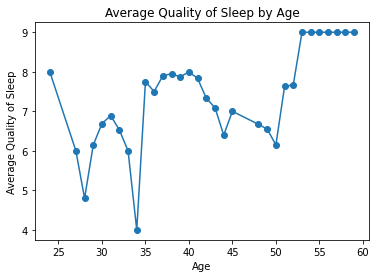

In [29]:
#extract the Age and Average Quality of Sleep columns
age = average_quality_of_sleep.select('Age').toPandas()['Age']
quality_of_sleep = average_quality_of_sleep.select('Average Quality of Sleep').toPandas()['Average Quality of Sleep']

#plot the Age and Average Quality of Sleep
plt.plot(age, quality_of_sleep, marker='o')
plt.title('Average Quality of Sleep by Age')
plt.xlabel('Age')
plt.ylabel('Average Quality of Sleep')
plt.show()

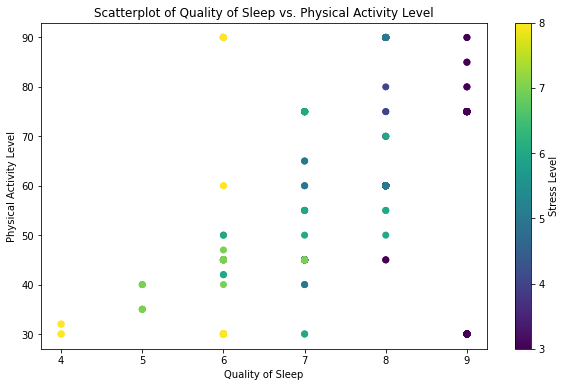

In [30]:
#8. Correlation between Quality of Sleep, Physical Activity Level and Stress Level
# Extract the columns for the scatterplot
x = df.select("Quality of Sleep").rdd.flatMap(lambda x: x).collect()
y = df.select("Physical Activity Level").rdd.flatMap(lambda x: x).collect()
colors = df.select("Stress Level").rdd.flatMap(lambda x: x).collect()

#Create the scatterplot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=colors, cmap='viridis')
plt.xlabel("Quality of Sleep")
plt.ylabel("Physical Activity Level")
plt.title("Scatterplot of Quality of Sleep vs. Physical Activity Level")
plt.colorbar(scatter, label="Stress Level")
plt.show()

In [31]:
#9. Correlation between Sleep duration and Quality of Sleep
correlation_sleep_duration_quality = df.corr("Sleep Duration", "Quality of Sleep")
print("Correlation between Sleep Duration and Quality of Sleep:", correlation_sleep_duration_quality)

Correlation between Sleep Duration and Quality of Sleep: 0.8827599898099926


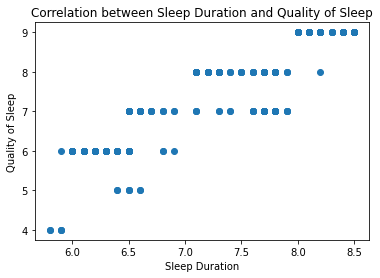

In [32]:
#plot the correlation
plt.scatter(df.select('Sleep Duration').toPandas(), df.select('Quality of Sleep').toPandas())
plt.title('Correlation between Sleep Duration and Quality of Sleep')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()

In [33]:
#10. Correlation between Sleep Disorder and Quality of Sleep
# Register the DataFrame as a temporary table
df.createOrReplaceTempView("sleep_data")

# Execute the SQL query to select Sleep Disorder and Quality of Sleep
sleep_disorder_and_quality = spark.sql("SELECT `Sleep Disorder`, `Quality of Sleep` FROM sleep_data")

# Show the result
sleep_disorder_and_quality.show()

+--------------+----------------+
|Sleep Disorder|Quality of Sleep|
+--------------+----------------+
|          None|               6|
|          None|               6|
|          None|               6|
|   Sleep Apnea|               4|
|   Sleep Apnea|               4|
|      Insomnia|               4|
|      Insomnia|               6|
|          None|               7|
|          None|               7|
|          None|               7|
|          None|               6|
|          None|               7|
|          None|               6|
|          None|               6|
|          None|               6|
|          None|               6|
|   Sleep Apnea|               5|
|   Sleep Apnea|               6|
|      Insomnia|               5|
|          None|               7|
+--------------+----------------+
only showing top 20 rows



In [34]:
from pyspark.sql.functions import avg

# Calculate the average of Quality of Sleep grouped by Sleep Disorder
average_quality_of_sleep = df.groupBy('Sleep Disorder').agg(avg('Quality of Sleep').alias('Average Quality of Sleep'))

# Show the result
average_quality_of_sleep.show()

+--------------+------------------------+
|Sleep Disorder|Average Quality of Sleep|
+--------------+------------------------+
|          None|       7.627272727272727|
|   Sleep Apnea|       7.205128205128205|
|      Insomnia|       6.532467532467533|
+--------------+------------------------+



### 2.4	Verify the data quality

In [35]:
#check null values
#iterate through each column and count the number of null values
for col in df.columns:
    null_count = df.filter(df[col].isNull()).count()
    print(f"Column '{col}': {null_count} null values")

Column 'Person ID': 0 null values
Column 'Gender': 0 null values
Column 'Age': 0 null values
Column 'Occupation': 0 null values
Column 'Sleep Duration': 0 null values
Column 'Quality of Sleep': 0 null values
Column 'Physical Activity Level': 0 null values
Column 'Stress Level': 0 null values
Column 'BMI Category': 0 null values
Column 'Blood Pressure': 0 null values
Column 'Heart Rate': 1 null values
Column 'Daily Steps': 1 null values
Column 'Sleep Disorder': 0 null values


In [36]:
#check detail of 'BMI Category'
#group the data by 'BMI Category' and count the occurrences of each category
bmi_category_counts = df.groupBy('BMI Category').count().orderBy('count', ascending=False)

#show the details
bmi_category_counts.show()

+-------------+-----+
| BMI Category|count|
+-------------+-----+
|       Normal|  196|
|   Overweight|  148|
|Normal Weight|   21|
|        Obese|   10|
+-------------+-----+



## Data Preparation 

### 3.1 Select Data

In [37]:
#create a new DataFrame 'df_select' by dropping the 'Heart Rate' column
df_select = df.drop('Heart Rate')

#show the 'df_select' DataFrame with first 2 rows
df_select.show(2)

+---------+------+---+-----------------+--------------+----------------+-----------------------+------------+------------+--------------+-----------+--------------+
|Person ID|Gender|Age|       Occupation|Sleep Duration|Quality of Sleep|Physical Activity Level|Stress Level|BMI Category|Blood Pressure|Daily Steps|Sleep Disorder|
+---------+------+---+-----------------+--------------+----------------+-----------------------+------------+------------+--------------+-----------+--------------+
|        1|  Male| 27|Software Engineer|           6.1|               6|                     42|           6|  Overweight|        126/83|       4200|          None|
|        2|  Male| 28|           Doctor|           6.2|               6|                     60|           8|      Normal|        125/80|      10000|          None|
+---------+------+---+-----------------+--------------+----------------+-----------------------+------------+------------+--------------+-----------+--------------+
only showi

In [38]:
#show variables
print("columns:", df_select.columns)

#coutn columns
column_count = len(df_select.columns)
print("Number of columns:", column_count)

columns: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Daily Steps', 'Sleep Disorder']
Number of columns: 12


### 3.2 Clean Data

In [39]:
#import original dataset
df_original = spark.read.csv('Datasets/Sleep_health_and_lifestyle_dataset(original).csv', inferSchema=True, header=True)

In [40]:
#the count of values in original dataset
for col in df_original.columns:
    count = df_original.select(col).count()
    print(f"Count of values in column '{col}': {count}")

Count of values in column 'Person ID': 374
Count of values in column 'Gender': 374
Count of values in column 'Age': 374
Count of values in column 'Occupation': 374
Count of values in column 'Sleep Duration': 374
Count of values in column 'Quality of Sleep': 374
Count of values in column 'Physical Activity Level': 374
Count of values in column 'Stress Level': 374
Count of values in column 'BMI Category': 374
Count of values in column 'Blood Pressure': 374
Count of values in column 'Heart Rate': 374
Count of values in column 'Daily Steps': 374
Count of values in column 'Sleep Disorder': 374


In [41]:
# Show the last row in the DataFrame
# Collect all rows into a list
all_rows = df.collect()

# Get the last row (which is the last element in the list)
last_row = all_rows[-1]

print(last_row)

Row(Person ID=375, Gender='Female', Age=24, Occupation='Teacher', Sleep Duration=8.199999809265137, Quality of Sleep=8, Physical Activity Level=80, Stress Level=4, BMI Category='Normal', Blood Pressure='125/80', Heart Rate=None, Daily Steps=None, Sleep Disorder='None')


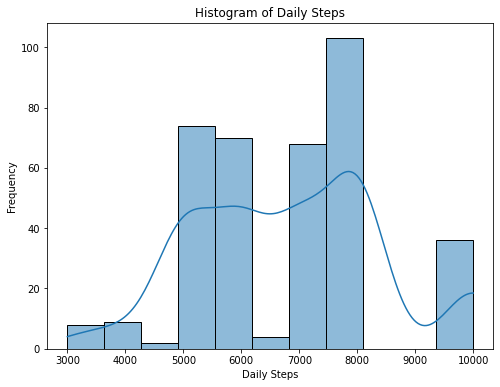

In [42]:
import pandas as pd

daily_steps_series = df.select("Daily Steps").toPandas()["Daily Steps"]

plt.figure(figsize=(8, 6))
sns.histplot(daily_steps_series, kde=True)
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Steps')
plt.show()

In [43]:
df_select.printSchema()

root
 |-- Person ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Quality of Sleep: integer (nullable = true)
 |-- Physical Activity Level: integer (nullable = true)
 |-- Stress Level: integer (nullable = true)
 |-- BMI Category: string (nullable = true)
 |-- Blood Pressure: string (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Disorder: string (nullable = true)



In [44]:
from pyspark.sql.functions import mean

# Calculate the mean of the 'Daily Steps' column
mean_daily_steps = df_select.select(mean("Daily Steps")).collect()[0][0]

# Fill missing values in 'Daily Steps' with the mean value
df_select = df_select.na.fill(mean_daily_steps, subset=['Daily Steps'])

#show the 375th row
row_with_id_375 = df_select.filter(df_select["Person ID"] == 375)
row_with_id_375.show()

+---------+------+---+----------+--------------+----------------+-----------------------+------------+------------+--------------+-----------+--------------+
|Person ID|Gender|Age|Occupation|Sleep Duration|Quality of Sleep|Physical Activity Level|Stress Level|BMI Category|Blood Pressure|Daily Steps|Sleep Disorder|
+---------+------+---+----------+--------------+----------------+-----------------------+------------+------------+--------------+-----------+--------------+
|      375|Female| 24|   Teacher|           8.2|               8|                     80|           4|      Normal|        125/80|       6816|          None|
+---------+------+---+----------+--------------+----------------+-----------------------+------------+------------+--------------+-----------+--------------+



In [45]:
from pyspark.sql.functions import when, col, trim, lower

# Create a new DataFrame 'df_clean' with the updated 'BMI Category'
df_clean = df_select.withColumn(
    "BMI Category",
    when((lower(trim(df_select["BMI Category"])) == "normal weight") | 
         (lower(trim(df_select["BMI Category"])) == "normal"), "Normal")
    .otherwise(df_select["BMI Category"])
)

# Group the data by 'BMI Category' and count the occurrences of each category
bmi_category_counts = df_clean.groupBy('BMI Category').count().orderBy('count', ascending=False)

# Show the details
bmi_category_counts.show()

+------------+-----+
|BMI Category|count|
+------------+-----+
|      Normal|  217|
|  Overweight|  148|
|       Obese|   10|
+------------+-----+



### 3.3 Construct Data

In [46]:
# rename
df_construct = df_clean.withColumnRenamed("Sleep Disorder", "Sleep Health")

df_construct.printSchema()

root
 |-- Person ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Quality of Sleep: integer (nullable = true)
 |-- Physical Activity Level: integer (nullable = true)
 |-- Stress Level: integer (nullable = true)
 |-- BMI Category: string (nullable = true)
 |-- Blood Pressure: string (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Health: string (nullable = true)



In [47]:
# create new column call sleep disorder
df_construct = df_construct.withColumn(
    "Sleep Disorder",
    when((df_construct["Sleep Health"] == "Insomnia") | (df_construct["Sleep Health"] == "Sleep Apnea"), True)
    .otherwise(False)
)

#show result
df_construct.printSchema()
Sleep_Disorder_counts = df_construct.groupBy('Sleep Disorder').count().orderBy('count', ascending=False)
Sleep_Disorder_counts.show()

root
 |-- Person ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Quality of Sleep: integer (nullable = true)
 |-- Physical Activity Level: integer (nullable = true)
 |-- Stress Level: integer (nullable = true)
 |-- BMI Category: string (nullable = true)
 |-- Blood Pressure: string (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Health: string (nullable = true)
 |-- Sleep Disorder: boolean (nullable = false)

+--------------+-----+
|Sleep Disorder|count|
+--------------+-----+
|         false|  220|
|          true|  155|
+--------------+-----+



In [48]:
# create new column call BMI Status
df_construct2 = df_construct.withColumn(
    "BMI Status",
    when((df_construct["BMI Category"] == "Normal"), True)
    .otherwise(False)
)

#show result
df_construct.printSchema()
Sleep_Disorder_counts = df_construct2.groupBy('BMI Status').count().orderBy('count', ascending=False)
Sleep_Disorder_counts.show()

root
 |-- Person ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Quality of Sleep: integer (nullable = true)
 |-- Physical Activity Level: integer (nullable = true)
 |-- Stress Level: integer (nullable = true)
 |-- BMI Category: string (nullable = true)
 |-- Blood Pressure: string (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Health: string (nullable = true)
 |-- Sleep Disorder: boolean (nullable = false)

+----------+-----+
|BMI Status|count|
+----------+-----+
|      true|  217|
|     false|  158|
+----------+-----+



### 3.4 Integrate Data

In [49]:
#create a new DataFrame 'df_select' by dropping the 'Heart Rate' column
df_1 = df_construct2.drop('Age', 'Occupation')

#show schema
df_1.printSchema()
df_1.show(n=1)

root
 |-- Person ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Quality of Sleep: integer (nullable = true)
 |-- Physical Activity Level: integer (nullable = true)
 |-- Stress Level: integer (nullable = true)
 |-- BMI Category: string (nullable = true)
 |-- Blood Pressure: string (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Health: string (nullable = true)
 |-- Sleep Disorder: boolean (nullable = false)
 |-- BMI Status: boolean (nullable = false)

+---------+------+--------------+----------------+-----------------------+------------+------------+--------------+-----------+------------+--------------+----------+
|Person ID|Gender|Sleep Duration|Quality of Sleep|Physical Activity Level|Stress Level|BMI Category|Blood Pressure|Daily Steps|Sleep Health|Sleep Disorder|BMI Status|
+---------+------+--------------+----------------+-----------------------+------------+------------+--------------+

In [50]:
#import original dataset
df_demographic = spark.read.csv('Datasets/Sleep Health and Demographic.csv', inferSchema=True, header=True)

#show schema
df_demographic.printSchema()
df_demographic.show(n=1)

root
 |-- Person ID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Occupation: string (nullable = true)

+---------+---+-----------------+
|Person ID|Age|       Occupation|
+---------+---+-----------------+
|        1| 27|Software Engineer|
+---------+---+-----------------+
only showing top 1 row



In [51]:
#merge two datasets
df_merged = df_1.join(df_demographic, on="Person ID", how="inner")
df_merged.printSchema()

root
 |-- Person ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Quality of Sleep: integer (nullable = true)
 |-- Physical Activity Level: integer (nullable = true)
 |-- Stress Level: integer (nullable = true)
 |-- BMI Category: string (nullable = true)
 |-- Blood Pressure: string (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Health: string (nullable = true)
 |-- Sleep Disorder: boolean (nullable = false)
 |-- BMI Status: boolean (nullable = false)
 |-- Age: integer (nullable = true)
 |-- Occupation: string (nullable = true)



In [52]:
df_merged.describe().show()

+-------+------------------+------+------------------+------------------+-----------------------+------------------+------------+--------------+------------------+------------+-----------------+----------+
|summary|         Person ID|Gender|    Sleep Duration|  Quality of Sleep|Physical Activity Level|      Stress Level|BMI Category|Blood Pressure|       Daily Steps|Sleep Health|              Age|Occupation|
+-------+------------------+------+------------------+------------------+-----------------------+------------------+------------+--------------+------------------+------------+-----------------+----------+
|  count|               375|   375|               375|               375|                    375|               375|         375|           375|               375|         375|              375|       375|
|   mean|             188.0|  null| 7.134933311462403| 7.314666666666667|      59.22666666666667| 5.381333333333333|        null|          null| 6816.842666666666|        null|

### 3.5 Format Data

In [53]:
#drop BMI Category and Sleep Health
df_formated = df_merged.drop('BMI Category', 'Sleep Health')
df_formated.printSchema()

root
 |-- Person ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Quality of Sleep: integer (nullable = true)
 |-- Physical Activity Level: integer (nullable = true)
 |-- Stress Level: integer (nullable = true)
 |-- Blood Pressure: string (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Disorder: boolean (nullable = false)
 |-- BMI Status: boolean (nullable = false)
 |-- Age: integer (nullable = true)
 |-- Occupation: string (nullable = true)



In [54]:
from pyspark.sql.functions import split

# Split the 'Blood Pressure' column into 'Systolic' and 'Diastolic' columns
df_formated2 = df_formated.withColumn('Systolic', split(df['Blood Pressure'], '/')[0].cast('integer'))
df_formated3 = df_formated2.withColumn('Diastolic', split(df['Blood Pressure'], '/')[1].cast('integer'))

# Show the DataFrame with the new columns
df_formated3 .printSchema()
df_formated3.show(n=1)

root
 |-- Person ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Quality of Sleep: integer (nullable = true)
 |-- Physical Activity Level: integer (nullable = true)
 |-- Stress Level: integer (nullable = true)
 |-- Blood Pressure: string (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Disorder: boolean (nullable = false)
 |-- BMI Status: boolean (nullable = false)
 |-- Age: integer (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Systolic: integer (nullable = true)
 |-- Diastolic: integer (nullable = true)

+---------+------+--------------+----------------+-----------------------+------------+--------------+-----------+--------------+----------+---+-----------------+--------+---------+
|Person ID|Gender|Sleep Duration|Quality of Sleep|Physical Activity Level|Stress Level|Blood Pressure|Daily Steps|Sleep Disorder|BMI Status|Age|       Occupation|Systolic|Diastolic|
+---------+-

In [55]:
df_formated4 = df_formated3.drop('Blood Pressure')
df_formated4.printSchema()

root
 |-- Person ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Quality of Sleep: integer (nullable = true)
 |-- Physical Activity Level: integer (nullable = true)
 |-- Stress Level: integer (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Disorder: boolean (nullable = false)
 |-- BMI Status: boolean (nullable = false)
 |-- Age: integer (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Systolic: integer (nullable = true)
 |-- Diastolic: integer (nullable = true)



## 4.0 DataTransformation

### 4.1 Reduce the data (feature seleciton)

In [56]:
# Define the stages of the transformation pipeline
# 1.transform 'Gender' using one-hot encoding
gender_indexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
gender_encoder = OneHotEncoder(inputCol="GenderIndex", outputCol="GenderVec")

# 2.transform 'Occupation' using label encoding
occupation_indexer = StringIndexer(inputCol="Occupation", outputCol="OccupationIndex")

# Assemble the transformation stages into a pipeline
pipeline = Pipeline(stages=[gender_indexer, gender_encoder, occupation_indexer])

# Fit and transform the data using the pipeline
df_trans = pipeline.fit(df_formated4).transform(df_formated4)

# Show the transformed DataFrame
df_trans.show(n=1)
df_trans.printSchema()

+---------+------+--------------+----------------+-----------------------+------------+-----------+--------------+----------+---+-----------------+--------+---------+-----------+-------------+---------------+
|Person ID|Gender|Sleep Duration|Quality of Sleep|Physical Activity Level|Stress Level|Daily Steps|Sleep Disorder|BMI Status|Age|       Occupation|Systolic|Diastolic|GenderIndex|    GenderVec|OccupationIndex|
+---------+------+--------------+----------------+-----------------------+------------+-----------+--------------+----------+---+-----------------+--------+---------+-----------+-------------+---------------+
|        1|  Male|           6.1|               6|                     42|           6|       4200|         false|     false| 27|Software Engineer|     126|       83|        0.0|(1,[0],[1.0])|            8.0|
+---------+------+--------------+----------------+-----------------------+------------+-----------+--------------+----------+---+-----------------+--------+--------

In [57]:
# Extract the mapping of numerical values to original categories
gender_mapping = df_trans.select("Gender", "GenderIndex").distinct()
occupation_mapping = df_trans.select("Occupation", "OccupationIndex").distinct()

# Show the mappings
gender_mapping.show()
occupation_mapping.show()

+------+-----------+
|Gender|GenderIndex|
+------+-----------+
|  Male|        0.0|
|Female|        1.0|
+------+-----------+

+--------------------+---------------+
|          Occupation|OccupationIndex|
+--------------------+---------------+
|           Scientist|            7.0|
|             Teacher|            4.0|
|             Manager|           10.0|
|              Doctor|            1.0|
|   Software Engineer|            8.0|
|              Lawyer|            3.0|
|         Salesperson|            6.0|
|Sales Representative|            9.0|
|            Engineer|            2.0|
|          Accountant|            5.0|
|               Nurse|            0.0|
+--------------------+---------------+



In [58]:
#drop extra columns
df_trans2 = df_trans.drop('Gender', 'GenderVec', 'Occupation')
df_trans2.printSchema()

root
 |-- Person ID: integer (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Quality of Sleep: integer (nullable = true)
 |-- Physical Activity Level: integer (nullable = true)
 |-- Stress Level: integer (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Disorder: boolean (nullable = false)
 |-- BMI Status: boolean (nullable = false)
 |-- Age: integer (nullable = true)
 |-- Systolic: integer (nullable = true)
 |-- Diastolic: integer (nullable = true)
 |-- GenderIndex: double (nullable = false)
 |-- OccupationIndex: double (nullable = false)



In [59]:
# Encode "Sleep Disorder" as 0 for False and 1 for True
df_trans3 = df_trans2.withColumn(
    "Sleep Disorder",
    when(df_trans2["Sleep Disorder"] == True, 1).otherwise(0)
)

# Encode "BMI Status" as 0 for False and 1 for True
df_trans4 = df_trans3.withColumn(
    "BMI Status",
    when(df_trans3["BMI Status"] == True, 1).otherwise(0)
)

In [60]:
df_trans4.printSchema()

root
 |-- Person ID: integer (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Quality of Sleep: integer (nullable = true)
 |-- Physical Activity Level: integer (nullable = true)
 |-- Stress Level: integer (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Disorder: integer (nullable = false)
 |-- BMI Status: integer (nullable = false)
 |-- Age: integer (nullable = true)
 |-- Systolic: integer (nullable = true)
 |-- Diastolic: integer (nullable = true)
 |-- GenderIndex: double (nullable = false)
 |-- OccupationIndex: double (nullable = false)



### Feature selection

In [61]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier

#Assemble Features
feature_columns = ["Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level",
                   "Daily Steps", "Age", "Systolic", "Diastolic", "GenderIndex", "OccupationIndex",
                   "BMI Status", "Person ID"]

vec_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = vec_assembler.transform(df_trans4)

#Train a Random Forest Classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="Sleep Disorder")
rf_model = rf.fit(df_assembled)

#Extract Feature Importance
feature_importances = rf_model.featureImportances

#Create a list of (feature, importance) pairs
feature_importance_pairs = list(zip(feature_columns, feature_importances))

#Sort the pairs by importance in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

#Print the sorted features and their importance
for feature, importance in sorted_feature_importance_pairs:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: BMI Status, Importance: 0.364869944501544
Feature: OccupationIndex, Importance: 0.2321389792740149
Feature: Systolic, Importance: 0.11884470140999426
Feature: Diastolic, Importance: 0.11121458846396333
Feature: Age, Importance: 0.04489833202207744
Feature: Daily Steps, Importance: 0.03814569872945428
Feature: Person ID, Importance: 0.03473245273740793
Feature: Stress Level, Importance: 0.029290165094464804
Feature: Sleep Duration, Importance: 0.012648510628575565
Feature: Quality of Sleep, Importance: 0.009393059561232453
Feature: Physical Activity Level, Importance: 0.00327596395043134
Feature: GenderIndex, Importance: 0.0005476036268398122


In [62]:
#select features
#select the desired columns
selected_columns = ["BMI Status", "OccupationIndex", "Diastolic", "Systolic", "Age", 
                    "Sleep Duration", "Daily Steps", "Sleep Disorder"]

#create the new DataFrame df_selected
df_selected = df_trans4.select(selected_columns)

#verify the schema of df_selected
df_selected.printSchema()

root
 |-- BMI Status: integer (nullable = false)
 |-- OccupationIndex: double (nullable = false)
 |-- Diastolic: integer (nullable = true)
 |-- Systolic: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Disorder: integer (nullable = false)



### 4.2 Project Data

In [63]:
#count Sleep Disorder
#group by the "Sleep Disorder" column and count occurrences of each parameter
sleep_disorder_counts = df_selected.groupBy("Sleep Disorder").count()

# Show the parameters and their counts
sleep_disorder_counts.show()

+--------------+-----+
|Sleep Disorder|count|
+--------------+-----+
|             1|  155|
|             0|  220|
+--------------+-----+



In [64]:
# Separate the DataFrame into two DataFrames for each class
df_class_0 = df_selected.filter(col("Sleep Disorder") == 0)
df_class_1 = df_selected.filter(col("Sleep Disorder") == 1)

# Calculate the oversampling ratio
class_0_count = df_class_0.count()
class_1_count = df_class_1.count()
oversampling_ratio = class_0_count / class_1_count

# Oversample the minority class (1)
df_class_1_oversampled = df_class_1.sample(withReplacement=True, fraction=oversampling_ratio, seed=42)

# Concatenate the oversampled minority class with the majority class
df_balanced = df_class_0.union(df_class_1_oversampled)

# Verify the count of each class in the balanced DataFrame
df_balanced.groupBy("Sleep Disorder").count().show()


+--------------+-----+
|Sleep Disorder|count|
+--------------+-----+
|             0|  220|
|             1|  217|
+--------------+-----+



In [65]:
# Group by "BMI Status" and "Sleep Disorder" columns and count occurrences
value_counts_BMI_Sleep = df_balanced.groupBy("BMI Status", "Sleep Disorder").count()

# Show the value counts
value_counts_BMI_Sleep.show()

+----------+--------------+-----+
|BMI Status|Sleep Disorder|count|
+----------+--------------+-----+
|         1|             0|  201|
|         0|             0|   19|
|         1|             1|   18|
|         0|             1|  199|
+----------+--------------+-----+



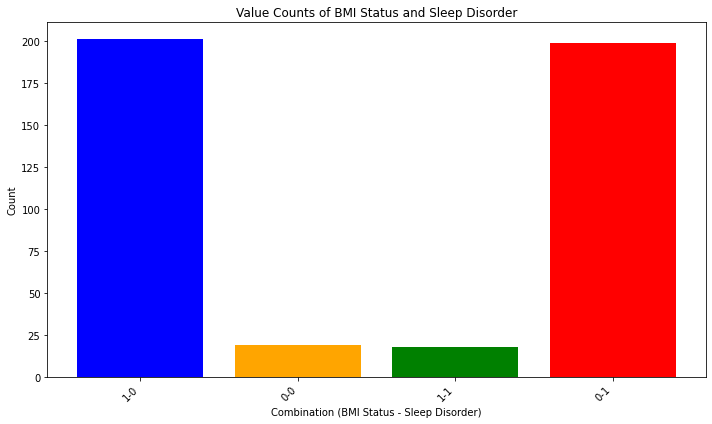

In [66]:
# Convert it to a Pandas DataFrame for visualization
value_counts_BMI_Sleep_pd = value_counts_BMI_Sleep.toPandas()

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    range(len(value_counts_BMI_Sleep_pd)),
    value_counts_BMI_Sleep_pd['count'],
    tick_label=[f'{row["BMI Status"]}-{row["Sleep Disorder"]}' for _, row in value_counts_BMI_Sleep_pd.iterrows()],
    color=['blue', 'orange', 'green', 'red']  # You can choose different colors
)

plt.xlabel('Combination (BMI Status - Sleep Disorder)')
plt.ylabel('Count')
plt.title('Value Counts of BMI Status and Sleep Disorder')
plt.xticks(rotation=45, ha='right')

# Show the chart
plt.tight_layout()
plt.show()


## 5.0 Data Mining Selection

### 5.1

In [67]:
df_balanced.printSchema()

df_balanced_count = df_balanced.count()
print(f"Number of samples in the training set: {df_balanced_count}")

root
 |-- BMI Status: integer (nullable = false)
 |-- OccupationIndex: double (nullable = false)
 |-- Diastolic: integer (nullable = true)
 |-- Systolic: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Disorder: integer (nullable = false)

Number of samples in the training set: 437


## 7.0 Data mining

### Single Decision Tree model 

In [68]:
#import library for decision tree classifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [69]:
#Define the feature columns (excluding the target column)
feature_columns = ['BMI Status', 'OccupationIndex', 'Diastolic', 'Systolic', 'Age', 'Sleep Duration', 'Daily Steps']

#Create a VectorAssembler to assemble the feature columns into a single feature vector
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
df_assembled = vector_assembler.transform(df_balanced)

In [70]:
#Split the data into 80% training and 20% testing
(training_data, test_data) = df_assembled.randomSplit([0.8, 0.2], seed=42)

In [71]:
# Create the Decision Tree classifier
dt = DecisionTreeClassifier(labelCol='Sleep Disorder', featuresCol='features', seed=42)

# Train the model
dt_model = dt.fit(training_data)

In [72]:
# Make predictions on the test data
predictions = dt_model.transform(test_data)

In [73]:
# Evaluate the model using BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol='Sleep Disorder', metricName='areaUnderROC')
auc = evaluator.evaluate(predictions)
print(f"AUC: {auc}")

AUC: 0.90406162464986


In [74]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create a MulticlassClassificationEvaluator
evaluator_multiclass = MulticlassClassificationEvaluator(
    labelCol='Sleep Disorder', 
    predictionCol='prediction', 
    metricName='accuracy'  # You can choose other metrics like 'accuracy', 'weightedPrecision', 'weightedRecall', etc.
)

In [75]:
# Calculate the evaluation metric
accuracy_score = evaluator_multiclass.evaluate(predictions)
print('The Single Decision Tree Model has an accuracy of: {0:2.2f}%'.format(accuracy_score*100))

The Single Decision Tree Model has an accuracy of: 92.11%


In [76]:
# Count the number of samples in the training set
training_count = training_data.count()
print(f"Number of samples in the training set: {training_count}")

# Count the number of samples in the testing set
testing_count = test_data.count()
print(f"Number of samples in the testing set: {testing_count}")

Number of samples in the training set: 361
Number of samples in the testing set: 76


### K-means

In [77]:
#import library
from pyspark.ml.clustering import KMeans

In [78]:
#Select the relevant columns for your K-means model
selected_columns_K = ["BMI Status", "OccupationIndex", "Diastolic", "Systolic", "Age", 
                      "Sleep Duration", "Daily Steps", "Sleep Disorder"]

#Create a VectorAssembler to combine selected columns into a feature vector
assembler_K = VectorAssembler(inputCols=selected_columns_K, outputCol="features")
df_assembled_K = assembler_K.transform(df_balanced)


In [79]:
#find the best optimal k
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(k=k, seed=42)
    model = kmeans.fit(df_assembled_K)
    predictions_K = model.transform(df_assembled_K)
    evaluator = ClusteringEvaluator()
    silhouette_score = evaluator.evaluate(predictions_K)
    silhouette_scores.append(silhouette_score)
    

best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because we started from k=2
print("best K is: ", best_k, " score: ", max(silhouette_scores))

best K is:  10  score:  0.9823392266596155


In [80]:
#Create a K-Means model
kmeans = KMeans(k=10, seed=42)  

#Fit the K-Means model to the data
model_K = kmeans.fit(df_assembled_K)

In [81]:
#Make predictions using the model
predictions_K = model_K.transform(df_assembled_K)

In [82]:
#View the clustering results
predictions_K.select("features", "prediction").show()

#Show the cluster centers
print("Cluster Centers:")
centers = model_K.clusterCenters()
for center in centers:
    print(center)

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[0.0,8.0,83.0,126...|         7|
|[1.0,1.0,80.0,125...|         2|
|[1.0,1.0,80.0,125...|         2|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
|[1.0,1.0,80.0,120...|         1|
+--------------------+----------+
only showing top 20 rows

Cluster Centers:
[2.02020202e-02 4.89898990e+00 8.70202020e+01 1.31929293e+02
 4.45050505e+01 6.53636365e+00 6.00202020e+03 9.19191919e-01]
[1.00000000e+00 2.

In [83]:
#counts in different prediction group
cluster_counts = predictions_K.groupBy("prediction").count()
cluster_counts.show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  106|
|         6|    6|
|         5|   77|
|         4|   71|
|         8|    4|
|         7|    8|
|         2|   46|
|         0|   99|
|         3|   16|
|         9|    4|
+----------+-----+



### 7.3 Search for Patterns

In [84]:
#Pattern 1: Feature Importance and correlation

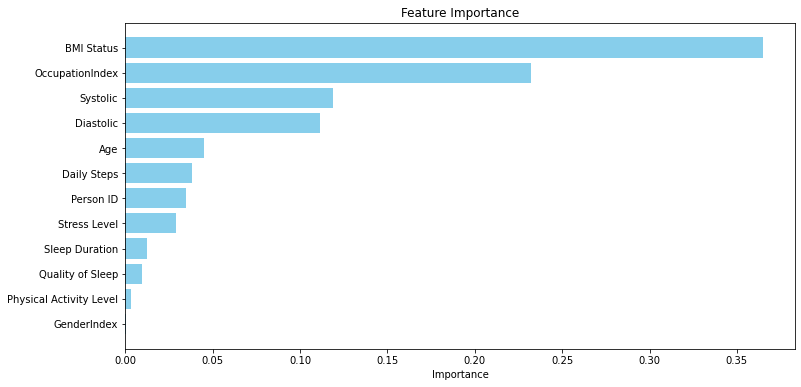

In [85]:
#Extract sorted features and their importance
sorted_features, sorted_importance = zip(*sorted_feature_importance_pairs)

#Plot the feature importance
plt.figure(figsize=(12, 6))
plt.barh(sorted_features, sorted_importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important features at the top
plt.show()

In [86]:
from pyspark.sql.functions import corr

# List of numeric column names
numeric_columns = ["BMI Status", "OccupationIndex", "Diastolic", "Systolic", "Age", 
                      "Sleep Duration", "Daily Steps", "Sleep Disorder"]
# Calculate and store correlations in a dictionary
correlations = {}

for col1 in numeric_columns:
    for col2 in numeric_columns:
        if col1 != col2:
            correlation_value = df_balanced.corr(col1, col2)
            correlations[(col1, col2)] = correlation_value

# Display the correlations
for (col1, col2), correlation_value in correlations.items():
    print(f"Correlation between {col1} and {col2}: {correlation_value}")

Correlation between BMI Status and OccupationIndex: -0.11305875886887415
Correlation between BMI Status and Diastolic: -0.7721442236104785
Correlation between BMI Status and Systolic: -0.75877085518587
Correlation between BMI Status and Age: -0.5252405051207533
Correlation between BMI Status and Sleep Duration: 0.3818656664253153
Correlation between BMI Status and Daily Steps: 0.07415160672293465
Correlation between BMI Status and Sleep Disorder: -0.8306696551957383
Correlation between OccupationIndex and BMI Status: -0.11305875886887415
Correlation between OccupationIndex and Diastolic: -0.356066412497318
Correlation between OccupationIndex and Systolic: -0.3008977486340769
Correlation between OccupationIndex and Age: -0.2629037754368134
Correlation between OccupationIndex and Sleep Duration: -0.2582979157664887
Correlation between OccupationIndex and Daily Steps: -0.3438254398282655
Correlation between OccupationIndex and Sleep Disorder: 0.04010265022935159
Correlation between Diasto

In [87]:
threshold = 0.5

for (col1, col2), correlation_value in correlations.items():
    if abs(correlation_value) > threshold:
        print(f"Correlation between {col1} and {col2}: {correlation_value}")

Correlation between BMI Status and Diastolic: -0.7721442236104785
Correlation between BMI Status and Systolic: -0.75877085518587
Correlation between BMI Status and Age: -0.5252405051207533
Correlation between BMI Status and Sleep Disorder: -0.8306696551957383
Correlation between Diastolic and BMI Status: -0.7721442236104785
Correlation between Diastolic and Systolic: 0.9738930752896412
Correlation between Diastolic and Age: 0.6338922002132014
Correlation between Diastolic and Sleep Disorder: 0.732475056090231
Correlation between Systolic and BMI Status: -0.7587708551858698
Correlation between Systolic and Diastolic: 0.9738930752896412
Correlation between Systolic and Age: 0.639429734378377
Correlation between Systolic and Sleep Disorder: 0.7276283227377555
Correlation between Age and BMI Status: -0.5252405051207532
Correlation between Age and Diastolic: 0.6338922002132013
Correlation between Age and Systolic: 0.6394297343783772
Correlation between Sleep Disorder and BMI Status: -0.8306

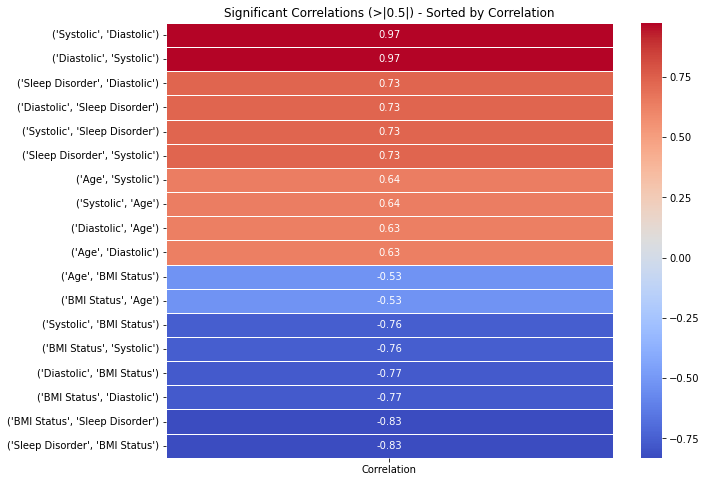

In [88]:
# Create a DataFrame from the correlation dictionary
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

# correlations to display when threshold is greater than 0.5
threshold = 0.5
significant_correlations = correlation_df[abs(correlation_df['Correlation']) > threshold]

# Sort the significant_correlations DataFrame by the "Correlation" column
significant_correlations_sorted = significant_correlations.sort_values(by='Correlation', ascending=False)

# Create a heatmap for sorted significant correlations
plt.figure(figsize=(10, 8))
sns.heatmap(significant_correlations_sorted, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'Significant Correlations (>|{threshold}|) - Sorted by Correlation')
plt.show()

In [89]:
#pattern 2: view tree model
tree_model_str = dt_model.toDebugString
print(tree_model_str)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_293ac04d1759, depth=2, numNodes=7, numClasses=2, numFeatures=7
  If (feature 0 <= 0.5)
   If (feature 3 <= 128.5)
    Predict: 0.0
   Else (feature 3 > 128.5)
    Predict: 1.0
  Else (feature 0 > 0.5)
   If (feature 2 <= 85.5)
    Predict: 0.0
   Else (feature 2 > 85.5)
    Predict: 1.0



In [90]:
#pattern 3: classification

23/10/09 13:47:05 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/09 13:47:05 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/10/09 13:47:05 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
23/10/09 13:47:05 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


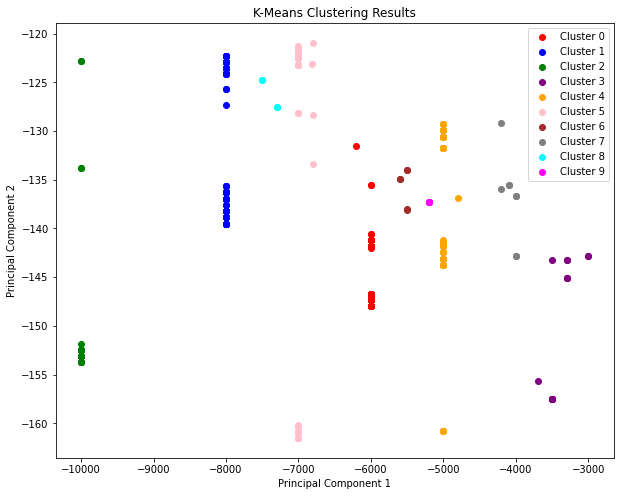

In [91]:
from pyspark.ml.feature import PCA

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")
model_pca = pca.fit(predictions_K)
transformed_data = model_pca.transform(predictions_K)

# Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = transformed_data.select("pcaFeatures", "prediction").toPandas()

# Extract PCA components
pca_features = np.array(pandas_df["pcaFeatures"].tolist())
x = pca_features[:, 0]
y = pca_features[:, 1]
cluster_labels = pandas_df["prediction"]

# Define distinct colors for each cluster
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']

# Create a scatter plot with distinct colors for each cluster
plt.figure(figsize=(10, 8))
for cluster_label in np.unique(cluster_labels):
    mask = (cluster_labels == cluster_label)
    plt.scatter(x[mask], y[mask], c=colors[cluster_label], label=f'Cluster {cluster_label}')

plt.title("K-Means Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [92]:
sorted_cluster_counts = cluster_counts.orderBy("prediction", ascending=True)
sorted_cluster_counts.show()

+----------+-----+
|prediction|count|
+----------+-----+
|         0|   99|
|         1|  106|
|         2|   46|
|         3|   16|
|         4|   71|
|         5|   77|
|         6|    6|
|         7|    8|
|         8|    4|
|         9|    4|
+----------+-----+



In [93]:
predictions_K.printSchema()

root
 |-- BMI Status: integer (nullable = false)
 |-- OccupationIndex: double (nullable = false)
 |-- Diastolic: integer (nullable = true)
 |-- Systolic: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Sleep Duration: float (nullable = true)
 |-- Daily Steps: integer (nullable = true)
 |-- Sleep Disorder: integer (nullable = false)
 |-- features: vector (nullable = true)
 |-- prediction: integer (nullable = false)



In [94]:
occupation_counts = predictions_K.groupBy("Sleep Disorder", "OccupationIndex").count()

# Show the occupation counts
occupation_counts.show()

+--------------+---------------+-----+
|Sleep Disorder|OccupationIndex|count|
+--------------+---------------+-----+
|             0|            2.0|   57|
|             0|            3.0|   42|
|             0|            0.0|    9|
|             0|            7.0|    2|
|             0|            8.0|    3|
|             0|            4.0|   10|
|             0|            5.0|   30|
|             0|           10.0|    1|
|             0|            1.0|   64|
|             0|            6.0|    2|
|             1|            6.0|   43|
|             1|            0.0|   85|
|             1|            7.0|    4|
|             1|            3.0|   12|
|             1|            9.0|    1|
|             1|            8.0|    1|
|             1|            5.0|    7|
|             1|            2.0|    5|
|             1|            1.0|   12|
|             1|            4.0|   47|
+--------------+---------------+-----+



In [95]:
from pyspark.sql.functions import count
from pyspark.sql.functions import avg, format_number

# Calculate cluster statistics
cluster_stats = predictions_K.groupBy("prediction").agg(
    format_number(avg("Sleep Disorder"), 2).alias("Sleep_Disorder"),
    format_number(avg("BMI Status"), 2).alias("Avg_BMI"),
    format_number(avg("OccupationIndex"), 2).alias("Avg_Occupation"),
    format_number(avg("Diastolic"), 2).alias("Avg_Dia"),
    format_number(avg("Systolic"), 2).alias("Avg_Systolic"),
    format_number(avg("Age"), 2).alias("Avg_Age"),
    format_number(avg("Sleep Duration"), 2).alias("Avg_Sleep"),
    format_number(avg("Daily Steps"), 2).alias("Avg_Steps"),
    format_number(count("*"), 2).alias("Cluster_Size")
)

# Sort the DataFrame by "prediction"
cluster_stats = cluster_stats.orderBy("prediction")

cluster_stats.show()

+----------+--------------+-------+--------------+-------+------------+-------+---------+---------+------------+
|prediction|Sleep_Disorder|Avg_BMI|Avg_Occupation|Avg_Dia|Avg_Systolic|Avg_Age|Avg_Sleep|Avg_Steps|Cluster_Size|
+----------+--------------+-------+--------------+-------+------------+-------+---------+---------+------------+
|         0|          0.92|   0.02|          4.90|  87.02|      131.93|  44.51|     6.54| 6,002.02|       99.00|
|         1|          0.12|   1.00|          2.16|  82.92|      125.85|  36.41|     7.50| 8,000.00|      106.00|
|         2|          0.87|   0.09|          0.09|  93.48|      138.39|  49.09|     6.16|10,000.00|       46.00|
|         3|          1.00|   0.00|          2.75|  90.31|      139.25|  40.88|     7.14| 3,387.50|       16.00|
|         4|          0.14|   0.87|          1.68|  81.18|      126.18|  43.35|     7.36| 4,997.18|       71.00|
|         5|          0.48|   0.47|          2.10|  85.69|      128.43|  47.81|     7.69| 6,989.

In [96]:
cluster_stats.printSchema()

root
 |-- prediction: integer (nullable = false)
 |-- Sleep_Disorder: string (nullable = true)
 |-- Avg_BMI: string (nullable = true)
 |-- Avg_Occupation: string (nullable = true)
 |-- Avg_Dia: string (nullable = true)
 |-- Avg_Systolic: string (nullable = true)
 |-- Avg_Age: string (nullable = true)
 |-- Avg_Sleep: string (nullable = true)
 |-- Avg_Steps: string (nullable = true)
 |-- Cluster_Size: string (nullable = true)



In [97]:
from pyspark.sql.functions import count, avg, format_number, regexp_replace

# Define a list of columns to convert to DoubleType
numeric_columns = ["Sleep_Disorder", "Avg_BMI", "Avg_Occupation", "Avg_Dia", "Avg_Systolic", "Avg_Age", "Avg_Sleep", "Avg_Steps", "Cluster_Size"]

# Remove commas from 'Avg_Steps' column
cluster_stats = cluster_stats.withColumn("Avg_Steps", regexp_replace(cluster_stats["Avg_Steps"], ",", ""))

# Convert the columns to DoubleType
for col in numeric_columns:
    cluster_stats = cluster_stats.withColumn(col, cluster_stats[col].cast(DoubleType()))

# Now, your DataFrame 'cluster_stats' should have the specified columns as DoubleType
cluster_stats.printSchema()

root
 |-- prediction: integer (nullable = false)
 |-- Sleep_Disorder: double (nullable = true)
 |-- Avg_BMI: double (nullable = true)
 |-- Avg_Occupation: double (nullable = true)
 |-- Avg_Dia: double (nullable = true)
 |-- Avg_Systolic: double (nullable = true)
 |-- Avg_Age: double (nullable = true)
 |-- Avg_Sleep: double (nullable = true)
 |-- Avg_Steps: double (nullable = true)
 |-- Cluster_Size: double (nullable = true)



In [98]:
cluster_stats.show()

+----------+--------------+-------+--------------+-------+------------+-------+---------+---------+------------+
|prediction|Sleep_Disorder|Avg_BMI|Avg_Occupation|Avg_Dia|Avg_Systolic|Avg_Age|Avg_Sleep|Avg_Steps|Cluster_Size|
+----------+--------------+-------+--------------+-------+------------+-------+---------+---------+------------+
|         0|          0.92|   0.02|           4.9|  87.02|      131.93|  44.51|     6.54|  6002.02|        99.0|
|         1|          0.12|    1.0|          2.16|  82.92|      125.85|  36.41|      7.5|   8000.0|       106.0|
|         2|          0.87|   0.09|          0.09|  93.48|      138.39|  49.09|     6.16|  10000.0|        46.0|
|         3|           1.0|    0.0|          2.75|  90.31|      139.25|  40.88|     7.14|   3387.5|        16.0|
|         4|          0.14|   0.87|          1.68|  81.18|      126.18|  43.35|     7.36|  4997.18|        71.0|
|         5|          0.48|   0.47|           2.1|  85.69|      128.43|  47.81|     7.69|  6989.

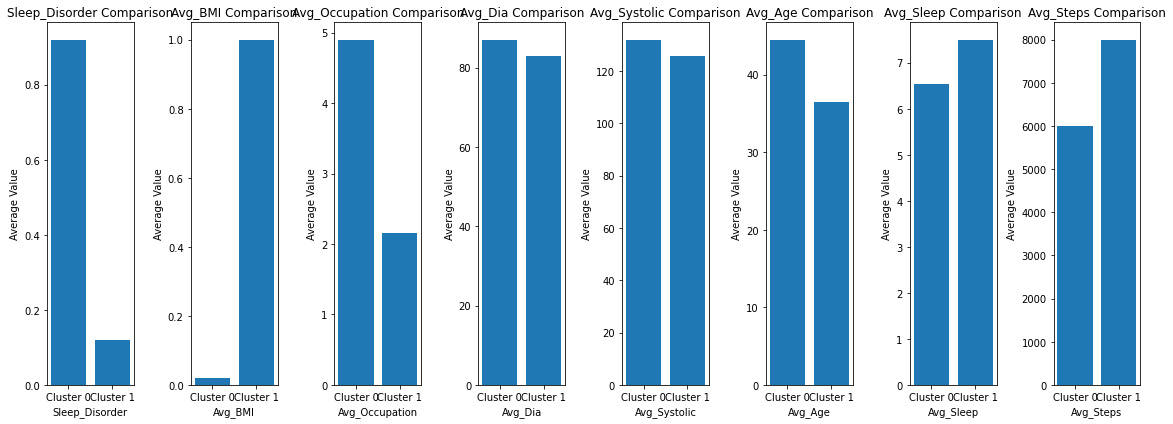

In [99]:
# Assuming you have your PySpark dataframe as 'cluster_stats'
# Convert it to a pandas dataframe
cluster_stats_pd = cluster_stats.toPandas()

# Filter the pandas dataframe for clusters 0 and 1
cluster_0 = cluster_stats_pd[cluster_stats_pd['prediction'] == 0]
cluster_1 = cluster_stats_pd[cluster_stats_pd['prediction'] == 1]

# Define the columns you want to compare (excluding 'prediction' and 'Cluster_Size')
columns_to_compare = ['Sleep_Disorder', 'Avg_BMI', 'Avg_Occupation', 'Avg_Dia', 'Avg_Systolic', 'Avg_Age', 'Avg_Sleep', 'Avg_Steps']

# Create a single figure for the comparison
num_columns = len(columns_to_compare)
fig, axes = plt.subplots(1, num_columns, figsize=(16, 6))

# Loop through the columns and create grouped bar charts
for i, column in enumerate(columns_to_compare):
    ax = axes[i]
    
    # Define the values for cluster 0 and cluster 1
    values_0 = cluster_0[column].values[0]
    values_1 = cluster_1[column].values[0]
    
    # Create positions for the bars
    x = np.arange(2)
    
    # Create the bars for cluster 0 and cluster 1
    ax.bar(x, [values_0, values_1], tick_label=['Cluster 0', 'Cluster 1'])
    ax.set_xlabel(column)
    ax.set_ylabel("Average Value")
    ax.set_title(f'{column} Comparison')

# Adjust spacing between subplots
plt.tight_layout()

# Show the single figure with grouped bar charts
plt.show()


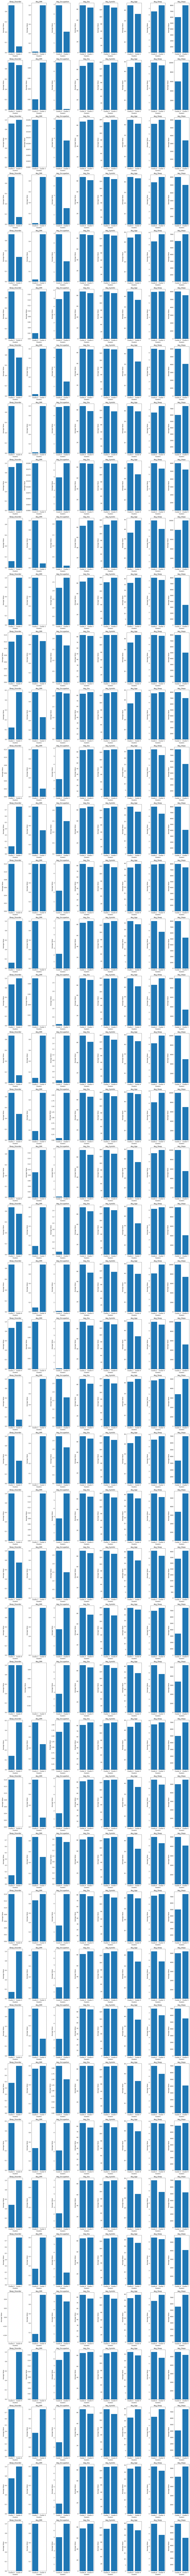

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Assuming you have your PySpark dataframe as 'cluster_stats'
# Convert it to a pandas dataframe
cluster_stats_pd = cluster_stats.toPandas()

# Define the clusters you want to compare (in this case, all 10 clusters)
all_clusters = range(10)

# Create all possible combinations of cluster pairs
cluster_pairs = list(combinations(all_clusters, 2))

# Define the columns you want to compare (excluding 'prediction' and 'Cluster_Size')
columns_to_compare = ['Sleep_Disorder', 'Avg_BMI', 'Avg_Occupation', 'Avg_Dia', 'Avg_Systolic', 'Avg_Age', 'Avg_Sleep', 'Avg_Steps']

# Create a single figure for the comparisons
num_columns = len(columns_to_compare)
num_pairs = len(cluster_pairs)
fig, axes = plt.subplots(num_pairs, num_columns, figsize=(20, 6 * num_pairs))

# Loop through the cluster pairs and columns, and create grouped bar charts for each combination
for i, (cluster1, cluster2) in enumerate(cluster_pairs):
    for j, column in enumerate(columns_to_compare):
        ax = axes[i, j]
        
        # Extract the values for the selected clusters
        values_cluster1 = cluster_stats_pd[cluster_stats_pd['prediction'] == cluster1][column].values[0]
        values_cluster2 = cluster_stats_pd[cluster_stats_pd['prediction'] == cluster2][column].values[0]
        
        # Create positions for the bars
        x = np.arange(2)
        
        # Create the bars for the selected clusters
        ax.bar(x, [values_cluster1, values_cluster2], tick_label=[f'Cluster {cluster1}', f'Cluster {cluster2}'])
        ax.set_xlabel("Clusters")
        ax.set_ylabel("Average Value")
        ax.set_title(f'{column}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the single figure with grouped bar charts for cluster comparisons
plt.show()


### 8.0 Intepretation

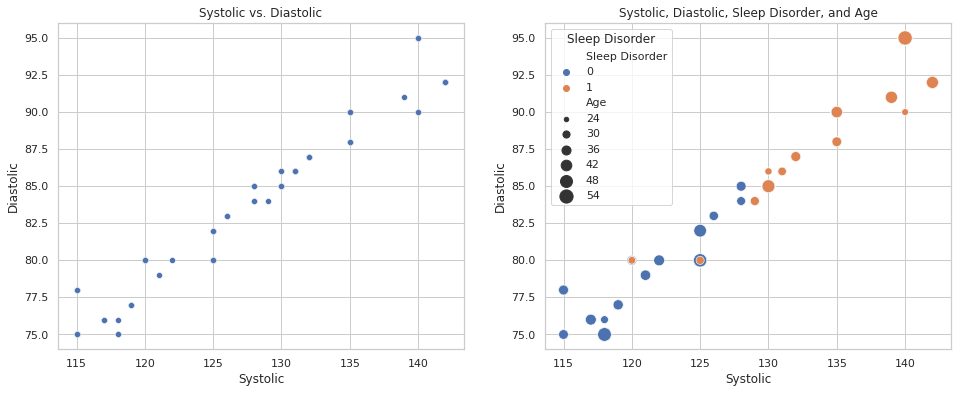

In [101]:
#Pattern 1
# Systolic-Diastolic, Systolic/Diastolic-Sleep Disorder, Systolic/Diastolic-Age 

# Convert it to a Pandas DataFrame for visualization
df_pd = df_balanced.toPandas()

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter Plot 1: Systolic vs. Diastolic
sns.scatterplot(data=df_pd, x='Systolic', y='Diastolic', ax=axes[0])
axes[0].set_title('Systolic vs. Diastolic')
axes[0].set_xlabel('Systolic')
axes[0].set_ylabel('Diastolic')

# Scatter Plot 2: Systolic, Diastolic, Sleep Disorder, and Age
sns.scatterplot(data=df_pd, x='Systolic', y='Diastolic', hue='Sleep Disorder', size='Age', sizes=(20, 200), ax=axes[1])
axes[1].set_title('Systolic, Diastolic, Sleep Disorder, and Age')
axes[1].set_xlabel('Systolic')
axes[1].set_ylabel('Diastolic')

# Add a legend for the second plot
axes[1].legend(title='Sleep Disorder')

# Show the plots
plt.show()

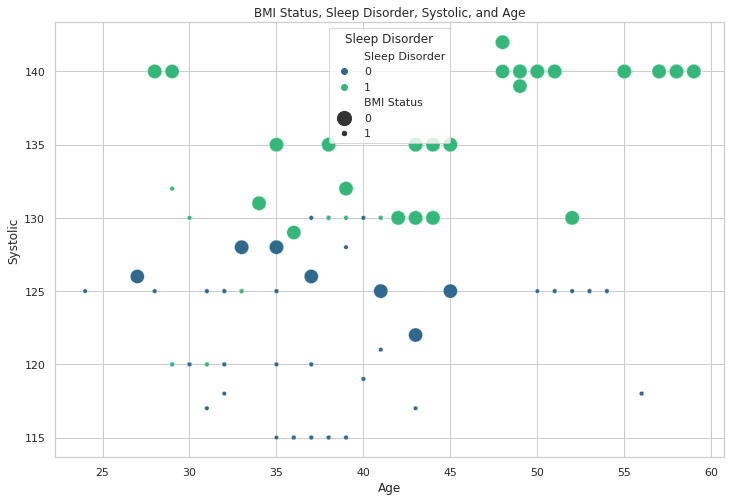

In [102]:
#Patttern 2
# Create a figure with subplots
fig, axes = plt.subplots(1, 1, figsize=(12, 8))

# Scatter Plot: BMI Status, Sleep Disorder, Systolic, Diastolic, and Age
sns.scatterplot(
    data=df_pd,
    x='Age',
    y='Systolic',
    hue='Sleep Disorder',
    size='BMI Status',
    sizes=(20, 200),
    palette='viridis',  # You can choose a different color palette
    ax=axes
)

axes.set_title('BMI Status, Sleep Disorder, Systolic, and Age')
axes.set_xlabel('Age')
axes.set_ylabel('Systolic')

# Add a legend for the second plot
axes.legend(title='Sleep Disorder')

# Show the plot
plt.show()

In [103]:
#Pattern 3
#Decision Tree presentation
for index, feature in enumerate(feature_columns):
    print(f'{index}: {feature}')

0: BMI Status
1: OccupationIndex
2: Diastolic
3: Systolic
4: Age
5: Sleep Duration
6: Daily Steps


In [104]:
#Pattern 4
#Clusters detail, figure shown in feature selection section and 5.0